resize


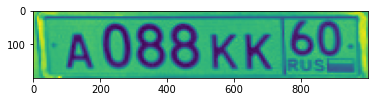

149
1.34
Contrast


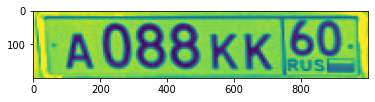

viniet


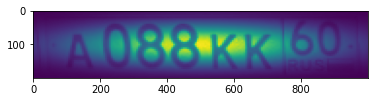

th


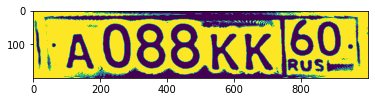

borders


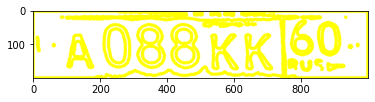

Numbers


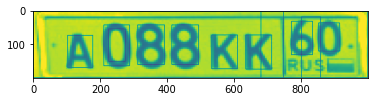

[[0, 199, 680, 999], [35, 119, 852, 915], [30, 130, 771, 834], [10000, 17, 801, 858], [0, 199, 0, 747], [72, 168, 103, 178], [71, 173, 635, 712], [71, 172, 533, 610], [41, 159, 414, 494], [41, 159, 312, 392], [41, 163, 211, 288], [53, 150, 225, 275]]
61411295-2878-48fa-9365-802841fb6efd.jpg


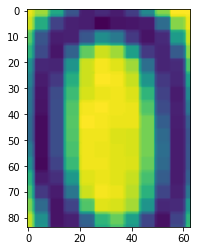

a8111bae-7268-4654-846f-a89c5f112f26.jpg


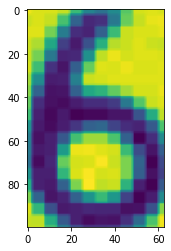

8caf6716-f039-414e-a085-5ad147a4384d.jpg


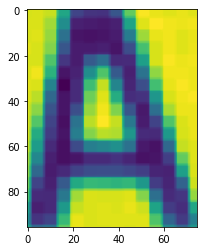

6108702c-03c4-4e22-b5bc-bf9b59ca5744.jpg


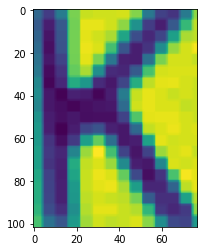

210ad599-060e-4fc3-adb5-6127b57e3002.jpg


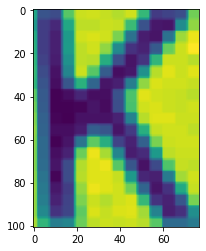

9eb4b5f8-dcb0-4f11-a1d9-60c1e25512e9.jpg


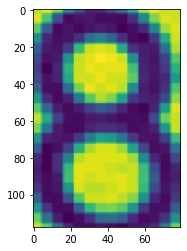

73ab3b88-c187-4394-8ba0-56d6d70f2cbc.jpg


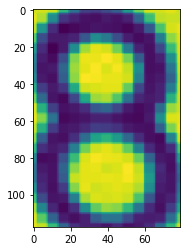

b7ff606d-9718-4834-9d6e-0c9912a01d6f.jpg


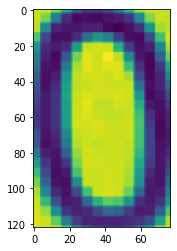

resize


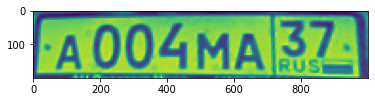

141
1.3933333333333333
Contrast


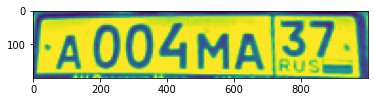

viniet


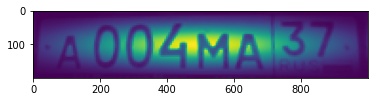

th


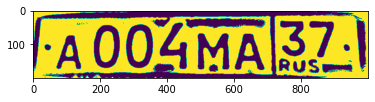

borders


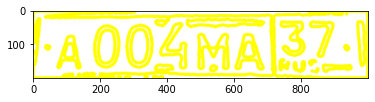

Numbers


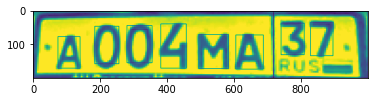

[[0, 199, 718, 999], [33, 133, 828, 895], [36, 130, 740, 809], [0, 199, 0, 717], [76, 170, 74, 140], [71, 173, 605, 687], [70, 171, 494, 583], [45, 157, 184, 256], [43, 154, 280, 355], [55, 154, 292, 342], [38, 170, 381, 457]]
a5975417-54a5-4e4e-a60b-2421d7ed0513.jpg


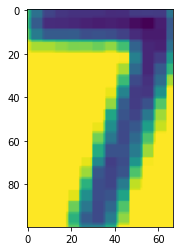

069ce6dc-fc20-4b8c-a98b-c5fb4444139f.jpg


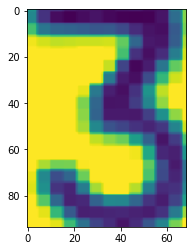

a3a77fb4-5c45-4033-b60b-39819217f61b.jpg


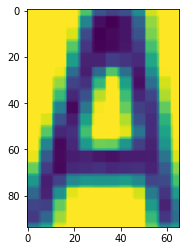

52ac92fb-f205-4447-8e40-0d7edf477fb9.jpg


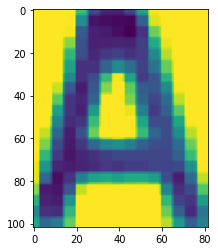

8b2a8822-5fb0-4767-a911-17ef45400347.jpg


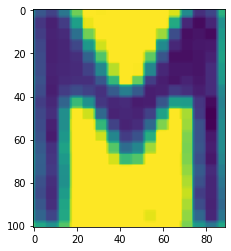

d48dbd54-bf4b-418f-bcff-ed3c90adc46f.jpg


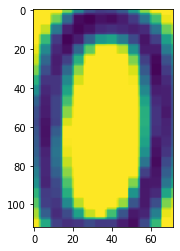

adb2c688-34f2-41cb-8b2d-b09ba2733ccd.jpg


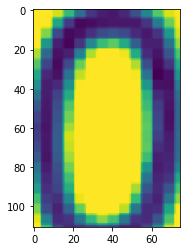

6b3b3d44-7694-42f9-82d2-da7da47c3376.jpg


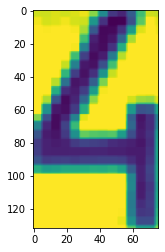

resize


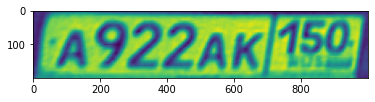

90
1.7333333333333334
Contrast


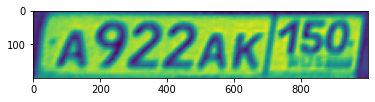

viniet


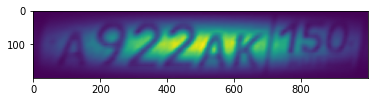

th


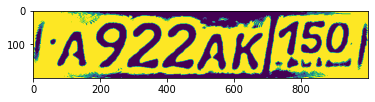

borders


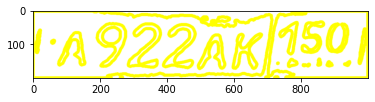

Numbers


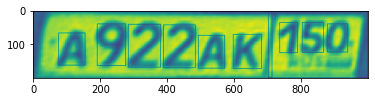

[[0, 199, 702, 999], [38, 122, 878, 939], [34, 124, 736, 789], [34, 123, 803, 867], [0, 197, 0, 713], [72, 170, 493, 572], [69, 171, 597, 682], [65, 161, 76, 155], [41, 169, 389, 484], [39, 167, 284, 380], [38, 162, 191, 276]]
52e9529f-5738-42fd-9ce8-b17c786000ba.jpg


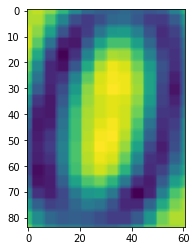

ef80fb38-4a45-4f14-8ca0-d51bce9122da.jpg


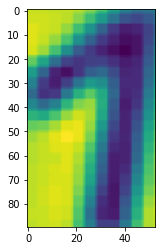

82ebb2f4-230e-476a-9430-c1c0d80298dc.jpg


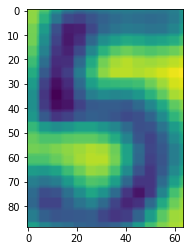

0b28201f-fc94-4729-9c99-984f4d72e72f.jpg


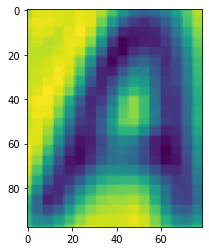

2635e4d4-02f9-4474-a513-12efb4a56c12.jpg


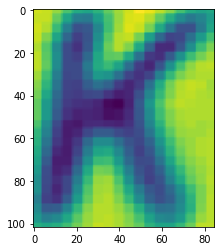

d074b46a-a870-4002-beb4-fa2643a7e422.jpg


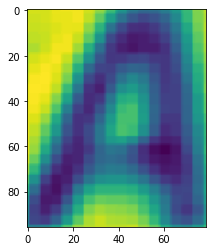

a08b9112-61a5-4116-a6c9-f7fec4032af8.jpg


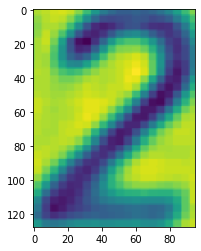

dbf328d8-37d2-4b2a-90ea-4097793625b9.jpg


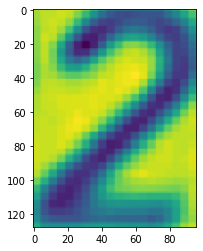

87bc4bcb-f4b9-4f98-bef2-4a67d14c364d.jpg


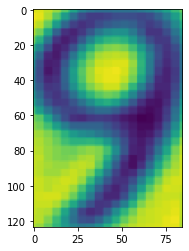

resize


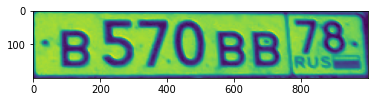

127
1.4866666666666668
Contrast


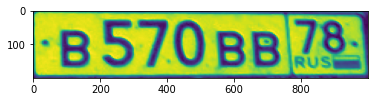

viniet


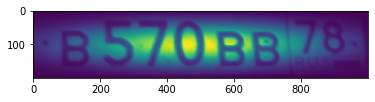

th


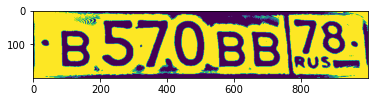

borders


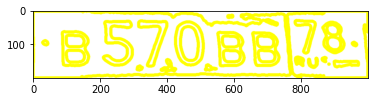

Numbers


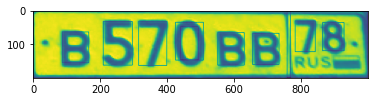

[[0, 198, 758, 999], [34, 118, 864, 928], [29, 121, 782, 842], [0, 199, 0, 768], [66, 159, 655, 734], [64, 161, 551, 630], [62, 154, 87, 166], [33, 146, 425, 508], [46, 145, 440, 493], [31, 161, 209, 296], [30, 162, 315, 399]]
9d6697d3-61b4-4e5f-8d25-1925084021e1.jpg


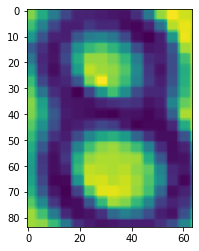

2aeec482-41de-4390-92a6-1ad1e53af3fb.jpg


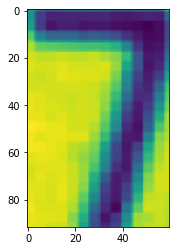

dc48e2d5-92f9-4077-a7c7-00f79797a670.jpg


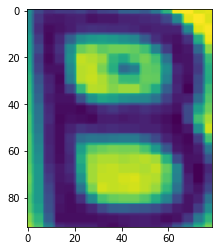

3220237d-fdd0-488a-98b3-f598f9f4e923.jpg


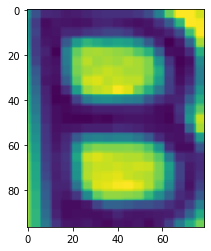

0de8ac1f-2915-44db-a551-27ff35580801.jpg


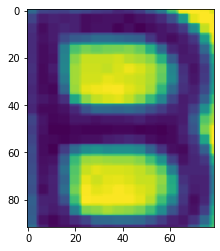

1ae6aba2-9767-403a-9476-942df9ceb6f4.jpg


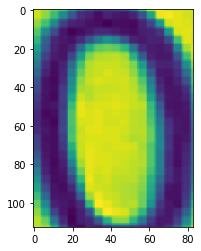

e27a3d33-7912-4e34-a5fa-30c8beb03729.jpg


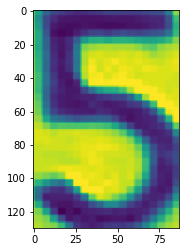

1d373fd9-e1e9-439c-8925-ff5d2b6afe79.jpg


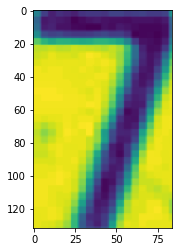

resize


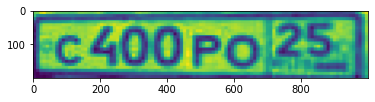

47
2.02
Contrast


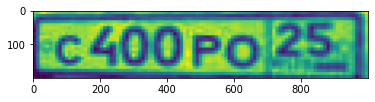

viniet


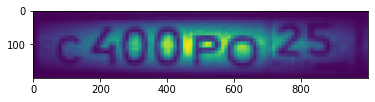

th


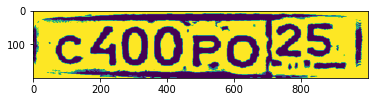

borders


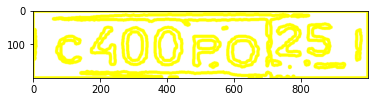

Numbers


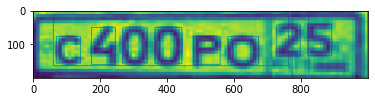

[[0, 199, 0, 999], [76, 158, 581, 673], [88, 151, 595, 658], [77, 160, 479, 558], [76, 155, 70, 142], [50, 155, 267, 340], [49, 157, 364, 444], [61, 147, 377, 428], [49, 159, 174, 245], [41, 134, 727, 797], [39, 132, 820, 890], [10000, -1, 773, 823], [10, 163, 60, 763]]
1d43458a-04c6-47dd-9fdd-a2aa41f86c08.jpg


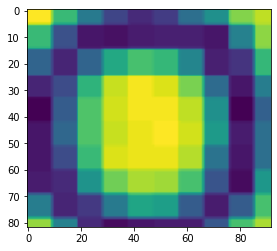

75aae0f8-17f9-407e-9702-4fdb3e970e99.jpg


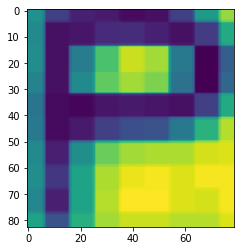

eca6e8e0-8c51-49a8-b80f-79dba12b0f77.jpg


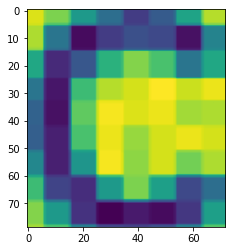

5c7eb12d-3f95-47a5-8c1c-5ae7576e89cf.jpg


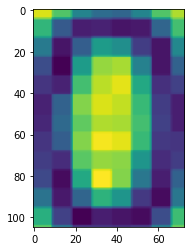

25d62a28-9e92-4e1d-a0f5-4c5954adf16d.jpg


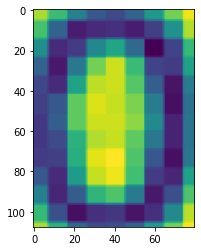

d7c35439-77cf-420a-a822-8fad393fafff.jpg


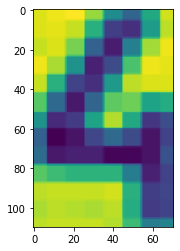

3d56e50e-705a-4b1e-9657-ff0b97b0c1b5.jpg


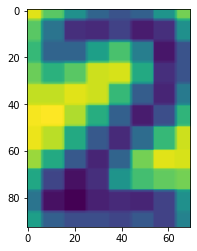

6461fbe9-030b-43a2-9b98-0c201eea7900.jpg


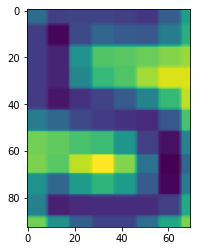

In [1]:
import cv2 # добавить библеотеки
import os
import sys
import numpy
from matplotlib import pyplot as plt
from statistics import mean 
import uuid
filename = str(uuid.uuid4())

os.chdir('C://Users//IQ//DataSet//Images//train//img')  # изменяем путь
  # создаем переменную в которой будет хранится изображение

def viewImage(image, name_of_window): # создаем функцию
    print(name_of_window)
    plt.imshow(image)
    plt.show()
#   cv2.namedWindow(name_of_window, cv2.WINDOW_NORMAL)  
#     cv2.imshow(name_of_window, image) # открываем изображение
#     cv2.waitKey(0) # ждем пока не нажмем на кнопку
#     cv2.destroyAllWindows() # закрываем открытые программой окна



def Resize(image):
    image2 = cv2.resize(image, (1000, 200), interpolation = cv2.INTER_AREA) 
    return(image2)

def Contrast(resized):
    rows, cols = resized.shape[:2]
    Array = []
    for i in range(rows):
        for j in range(cols):
            Array.append(resized[i][j])  
    print(mean(Array))
    mean(Array)
    if 200 - mean(Array) > 0:
        alpha2 = 1 + (200 - mean(Array))/150 # Contrast control (1.0-3.0)
    else:
        alpha2 = 1 - (mean(Array) - 200)/150 # Contrast control (1.0-3.0)
    print(alpha2)
    beta = 0 # Brightness control (0-100)
    alpha = alpha2
    adjusted = cv2.convertScaleAbs(resized, alpha=alpha, beta=beta)
    return(adjusted)

def Gray(bgr_image):
    bgr_image = cv2.cvtColor(adjusted, cv2.COLOR_RGB2BGR) # изменить тип цвета на BGR


    gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY) # изменить цвет на серый
    return(gray_image)

def Viniet(gray_image):
    row, cols = gray_image.shape

    a = cv2.getGaussianKernel(cols, 250)
    b = cv2.getGaussianKernel(row, 40)
    c = b * a.T
    d = c / c.max()
    e = gray_image * d
    
    
    ImgName = "Test5.jpg"
    im = cv2.imwrite(ImgName,e)

    image2 = cv2.imread(ImgName, 0)
    
    return(image2)

def Blur1(image2):
    blurred = cv2.GaussianBlur(image2, (15, 15), 0) # добавить блюр
    return(blurred)

def Thresholding(blurred):
    th3 = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
        cv2.THRESH_BINARY,69,2)
    return(th3)
    
def Blur2(image2):
    blurred2 = cv2.GaussianBlur(image2, (7, 7), 0) # добавить блюр
    return(blurred2)
   
def Contours(blurred2):
    
    contours, hierarchy = cv2.findContours(blurred2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # находим контуры

    
    whiteimage = cv2.imread('C://Users//IQ//TestFile//WhiteIm.jpg')
    Wcut = whiteimage[0:200,                         # первая точка высоты:вторая точка высоты,
                    0:1000]  
    
    cv2.drawContours(Wcut, contours, -1, (255,255,0), 7, cv2.LINE_AA, hierarchy, 3)
    # отображаем контуры поверх изображения
    return(Wcut, contours)  
 
def Boxes(contours, gray_image):
    bounding_boxes = []
    for countor in contours:
        xmin, xmax, ymin, ymax = 10000, -1, 10000, -1
        
        for point in countor:
            point = point[0]
            
            x, y = point
            if x > xmax:
                xmax = x
            elif x < xmin:
                xmin = x
            elif y > ymax:
                ymax = y
            elif y < ymin:
                ymin = y
        if xmin == xmax or ymin == ymax or abs(xmax - xmin) < 50 or abs(ymax - ymin) < 50:
            continue
        bounding_boxes.append([ymin, ymax, xmin, xmax])
        cv2.rectangle(gray_image,(xmin, ymax), (xmax, ymin), (0,255,255), 1)
    return(bounding_boxes, gray_image)

l = os.listdir()  
Plates = 0
NUM = 0
for i in l:
    Plates += 1
    image = cv2.imread(i, 0)
    
    
    resized = Resize(image)
    viewImage(resized, "resize") 
    # выводим изображение в окно
    
    adjusted = Contrast(resized)
    viewImage(adjusted, "Contrast")
    
   


    gray_image = Gray(adjusted)
    cut_image = gray_image.copy()

    #########################################
    
    image2 = Viniet(gray_image)
    viewImage(image2, "viniet")
    ########################################
    
    blurred = Blur1(image2)

    #######################################

    
    th3 = Thresholding(blurred)
    viewImage(th3, "th")
    
    #######################################
    
    
    
    blurred2 = Blur2(th3)
    
    
    Wcut, contours = Contours(blurred2)


    viewImage(Wcut, "borders")   # выводим итоговое изображение в окно
    
    bounding_boxes, gray_image = Boxes(contours, gray_image)
    
         
    viewImage(gray_image, "Numbers")
    print(bounding_boxes)
    Nxmin = 10000
    Nxmax = 10000
    for Num in bounding_boxes:
        
        if Num[0] == 10000 or Num[3] == 999 or Num[2] > Nxmin and Num[3] < Nxmax or Num[3] - Num[2] > 200:
            continue
        cut = cut_image[Num[0]:Num[1],                         # первая точка высоты:вторая точка высоты,
                    Num[2]:Num[3]]  
        Nxmin = Num[2]
        Nxmax = Num[3]
        
        filename = str(uuid.uuid4()) + ".jpg"
        
        viewImage(cut, filename)
        os.chdir('C://Users//IQ//Numbers') 
        
        
        im = cv2.imwrite(filename,cut)
        os.chdir('C://Users//IQ//DataSet//Images//train//img') 
        NUM += 1
    bounding_boxes = []
    if Plates == 5:
        break

In [ ]:
import cv2
import os
import sys
import numpy
from matplotlib import pyplot as plt
from statistics import mean 
os.chdir('C://Users//IQ//DataSet//Images//test//img')
img = cv2.imread('A001BP54.png', 0)
rows, cols = img.shape[:2]
Array = []
for i in range(rows):
    for j in range(cols):
        Array.append(img[i][j])  
        
print(mean(Array))   
alpha = 1.25 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
rows2, cols2 = adjusted.shape[:2]
Array2 = []
for i in range(rows2):
    for j in range(cols2):
        Array2.append(img[i][j])  
print(mean(Array2))

cv2.imshow('adjusted', adjusted)
cv2.waitKey(0)

cv2.destroyAllWindows() # закрываем открытые программой окна


In [ ]:

row,cols = image.shape



a = cv2.getGaussianKernel(cols,300)
b = cv2.getGaussianKernel(row,300)

c = b*a.T

d = c/c.max()

e = image*d



viewImage(image, "Hi")

In [ ]:
import cv2
import numpy as np
import os


os.chdir('C://Users//IQ//TestFile')  # изменяем путь
img = cv2.imread("a4da94u-960.jpg", 0)

cv2.waitKey(0) # ждем пока не нажмем на кнопку
cv2.destroyAllWindows()

row, cols = img.shape



a = cv2.getGaussianKernel(cols, 110)
b = cv2.getGaussianKernel(row, 60)
c = b * a.T
d = c / c.max()
e = img * d

ImgName = "Test1.jpg"
im = cv2.imwrite(ImgName,e)

img2 = cv2.imread(ImgName, 0)
cv2.imshow("Image", img2)
cv2.waitKey(0) # ждем пока не нажмем на кнопку
cv2.destroyAllWindows()